In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from __future__ import print_function #python 2 & 3
import visuals as vs

%matplotlib inline

full_data = pd.read_csv('titanic_data.csv')
display(full_data[:3])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth==pred).mean()*100)
    else :
        return "Prediction and truth counts don't match"

predictions = pd.Series(np.ones(5, dtype=int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


#### Question 1

In [3]:
#prediction that none survived
def predictions_0(data):
    return pd.Series(np.zeros(len(data)), dtype=int)

accuracy_score(outcomes, predictions_0(data))

'Predictions have an accuracy of 61.62%.'

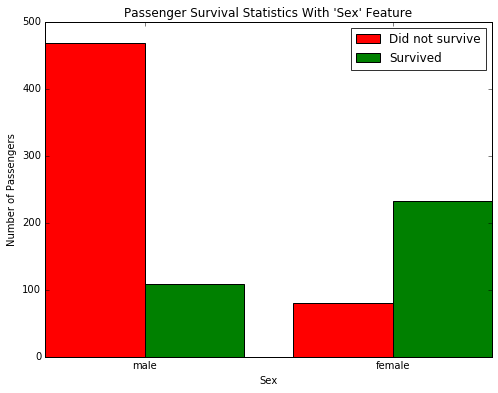

In [4]:
vs.survival_stats(data, outcomes, 'Sex')

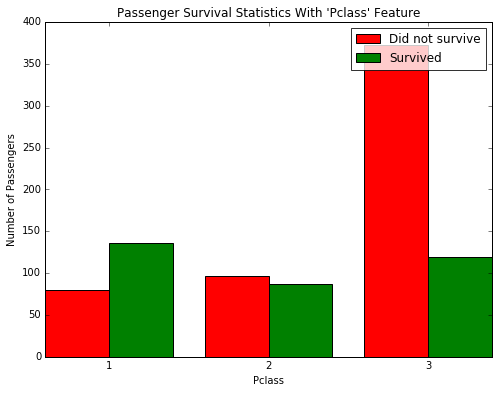

In [13]:
vs.survival_stats(data, outcomes, 'Pclass')

#### Question 2

In [5]:
#prediction that a passenger survives iff they're female
def prediction_1(data):
    return data['Sex'].map(lambda sex: sex == "female")

accuracy_score(outcomes, prediction_1(data))

'Predictions have an accuracy of 78.68%.'

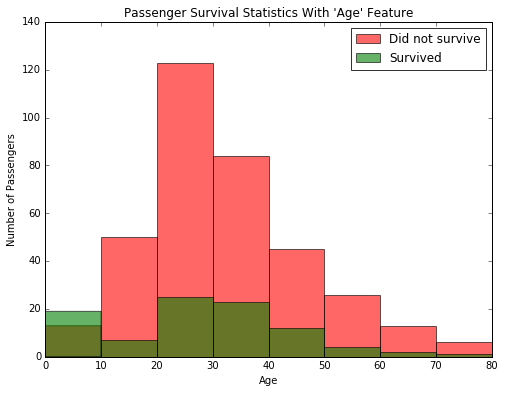

In [6]:
#plot of survival as f(age and sex) - plot is an overlay.
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

#### Question 3

In [7]:
#prediction that children below 10 and women survived
import math
def prediction_2(data):
    f_age = lambda x : (not math.isnan(x.Age)) and x.Age < 10
    return data.apply(lambda x: x.Sex == "female" or f_age(x), axis=1 )

accuracy_score(outcomes, prediction_2(data))

'Predictions have an accuracy of 79.35%.'

#### Question 4
We know considering the only survivors as children < 10 years of age and females gives us ~79% accuracy.

The idea is to find conditions where > 50% of passengers survived but are marked as dead because tagging them otherwise will strictly increase the accuracy of the predictor.
Similarly, we need to find conditions where > 50% of passengers died but are marked as survived and filter them out to increase the prediction accuracy.

##### Step 1
All females are broadly marked as 'survived'. We can get a greater accuracy by considering other features. 

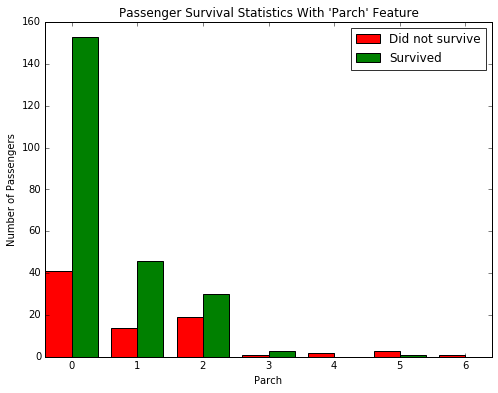

In [8]:
vs.survival_stats(data, 
                  outcomes, 
                  'Parch', 
                  ["Sex == 'female'"])

So we can filter out passengers with more than 3 parents and children aboard. 

##### Step 2
Now let's look at the effect of sibling count.

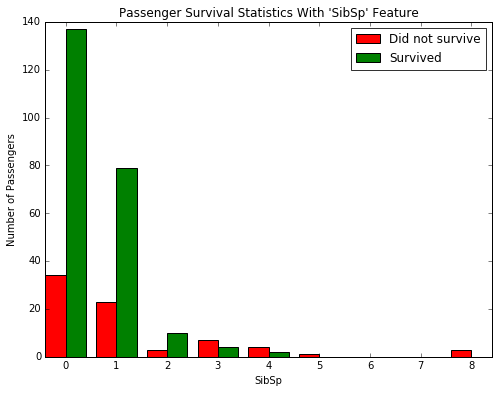

In [9]:
vs.survival_stats(data, 
                  outcomes, 
                  'SibSp', 
                  ["Sex == 'female'", "Parch < 4"])

So we can filter out females who had more than 2 siblings aboard.   

In [10]:
import math
def prediction_2_1(data):
    f_female = lambda x : x.Sex == "female" and x.SibSp < 3 and x.Parch < 4
    f_children = lambda x : (not math.isnan(x.Age)) and x.Age < 10
        
    return data.apply(lambda x: f_female(x) or f_children(x), axis=1)

accuracy_score(outcomes, prediction_2_1(data))

'Predictions have an accuracy of 80.25%.'

We've already reached the desired accuracy of 80+%. Let's analze the affect of survival rates of children being in different classes - as sad as it may seem.

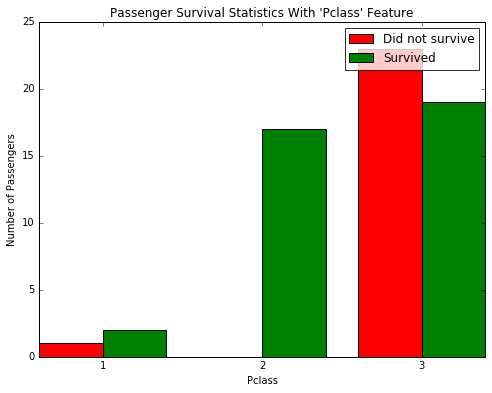

In [11]:
vs.survival_stats(data, 
                  outcomes, 
                  'Pclass', 
                  ['Age < 10'])

So children in class 3 don't have a very good survival rate. 

We looked at Sex, Age, Pclass, Parch and PsSib features in the predictor. Gender and age are the most informative features with others increasing the accuracy only marginally.

Along with some variation in age limits, this brings us to our final predictor conditions - 
Survivors are females with less than 3 siblings/spouse and less than 4 children or parents onboard or they are children aged less than 13 in an upper class than class 3.

In [12]:
#prediction that children and women with certain characteristics survive
def prediction_3(data):
    f_female = lambda x : x.Sex == "female" and x.SibSp < 3 and x.Parch < 4
    f_children = lambda x : (not math.isnan(x.Age)) and x.Age < 13 and x.Pclass < 3
        
    return data.apply(lambda x: f_female(x) or f_children(x), axis=1)

accuracy_score(outcomes, prediction_3(data))

'Predictions have an accuracy of 81.59%.'

#### Question 5
Decision trees can be used to predict the ads that one might be interested in. Outcome variable is given an ad, will a particular person click on it ? Relevant features to target the ad include age and gender.